<a href="https://colab.research.google.com/github/jungmin0710/K-digital-PythonMachineLearning/blob/main/Product_RF_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest 실습
1. Product_RF_작성자이름.ipynb
2. 탐색적 데이터 분석 및 시각화
3. y -> customerType('Online','Offline')
4. train_test_split - 7:3, 2045 적용
5. RandomForestClassifier 수행
6. Feature Importance 값 확인
7. GridSearchCV 적용
8. Metric -> Accuracy
9. LogisticRegression, DecisionTreeClassifier결과와 비교

4:40까지

###  1. 데이터 살펴보기

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
DF = pd.read_csv('https://raw.githubusercontent.com/rusita-ai/pyData/master/product.csv')

DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15009 entries, 0 to 15008
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           15009 non-null  object 
 1   meanPriceEach  15009 non-null  float64
 2   totalOrder     15009 non-null  float64
 3   orderType_1    15009 non-null  float64
 4   orderType_2    15009 non-null  float64
 5   orderType_3    15009 non-null  float64
 6   totalBundle    15009 non-null  float64
 7   bundleType_1   15009 non-null  float64
 8   bundleType_2   15009 non-null  float64
 9   customerType   15009 non-null  object 
 10  FY             15009 non-null  int64  
 11  Country        15009 non-null  int64  
dtypes: float64(8), int64(2), object(2)
memory usage: 1.4+ MB


In [ ]:
DF.head()

,Date,meanPriceEach,totalOrder,orderType_1,orderType_2,orderType_3,totalBundle,bundleType_1,bundleType_2,customerType,FY,Country
0,2015-01-04,1.56,58065.35,10049.66,25228.37,3672.89,19114.43,17280.89,1833.54,Online,2015,25
1,2015-01-04,1.10,2578275.12,575245.44,1311502.53,181058.65,510468.50,429166.89,80986.81,Offline,2015,25
2,2015-01-11,1.17,2335986.11,560119.16,1032606.49,191515.19,551745.27,465764.93,85966.27,Offline,2015,25
3,2015-01-11,1.52,65483.08,14570.74,30445.75,3170.11,17296.48,16715.45,581.03,Online,2015,25
4,2015-01-18,1.65,52559.10,11415.28,25306.56,3345.08,12492.18,10971.43,1520.75,Online,2015,25


In [ ]:
DF.customerType.value_counts()

Offline    7506
Online     7503
Name: customerType, dtype: int64

In [ ]:
DF.Country.value_counts()

47    278
49    278
27    278
19    278
11    278
3     278
50    278
42    278
34    278
26    278
18    278
10    278
2     278
41    278
39    278
33    278
25    278
17    278
9     278
1     278
48    278
40    278
32    278
24    278
16    278
8     278
35    278
43    278
51    278
4     278
31    278
23    278
15    278
7     278
46    278
38    278
30    278
22    278
14    278
6     278
45    278
37    278
29    278
21    278
13    278
5     278
52    278
44    278
36    278
28    278
20    278
12    278
0     278
53    275
Name: Country, dtype: int64

In [ ]:
DF.Country.unique()
#0부터 53까지

array([25,  4, 42, 26, 51, 10, 16, 53, 33, 43, 17, 50,  6, 35,  1,  7, 48,
       24, 46, 41,  3, 36, 39,  2, 27,  8, 23,  0, 52, 32, 29, 40, 31, 30,
       21, 20, 11, 22, 12, 44, 47, 14, 19, 49, 28, 34,  9, 37, 18,  5, 15,
       45, 38, 13])

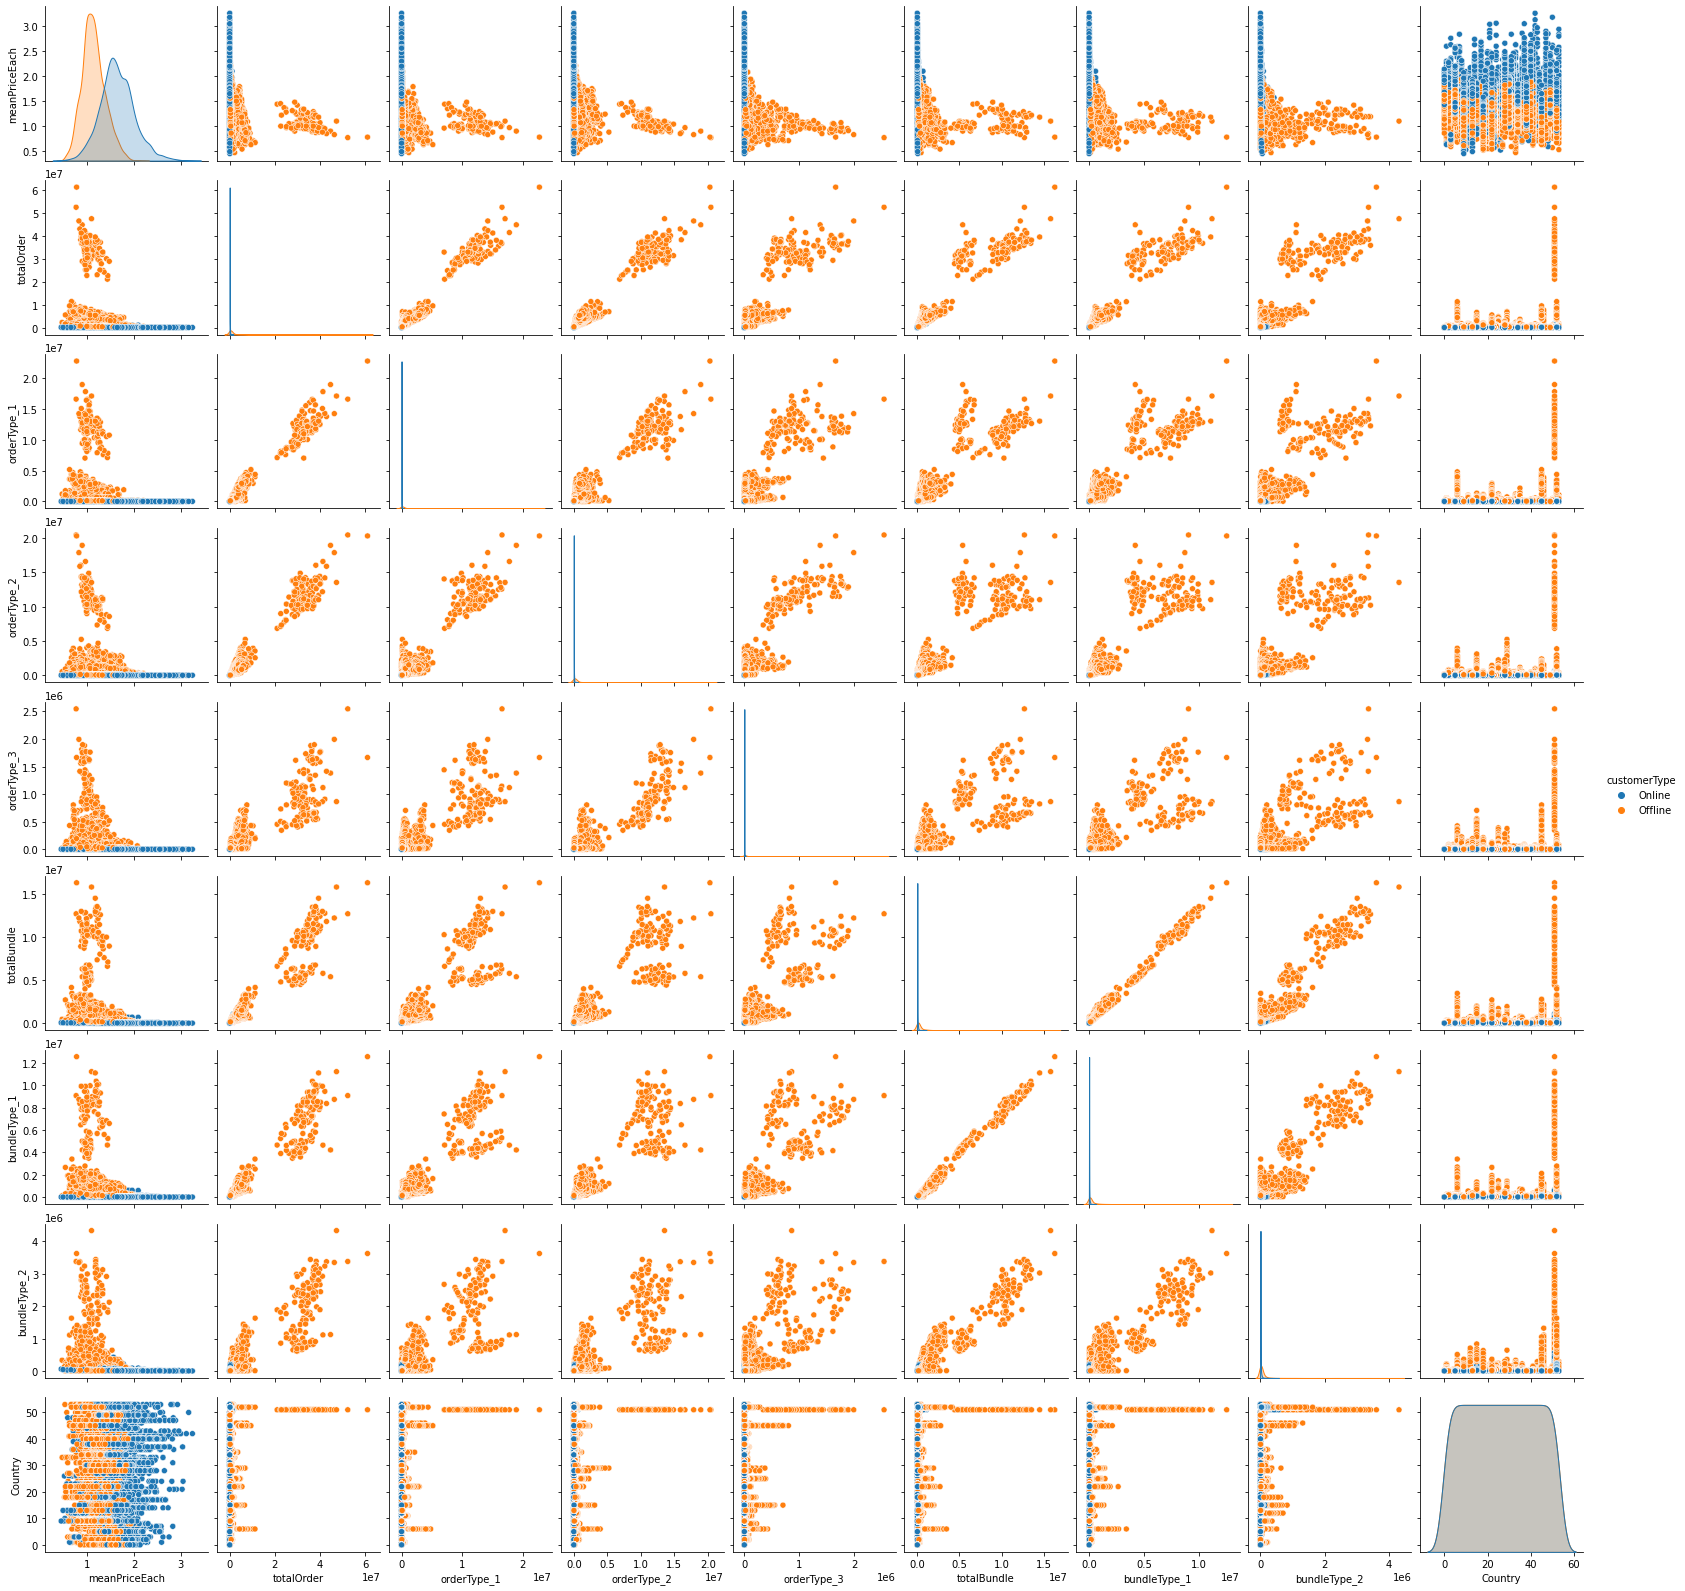

In [ ]:
sns.pairplot(DF, hue = 'customerType',
             vars = ['meanPriceEach','totalOrder','orderType_1','orderType_2','orderType_3','totalBundle','bundleType_1','bundleType_2','Country'])
plt.show()

> 2) 데이터 전처리
* Data Set

In [ ]:
#날짜 빼고 다 넣을 것
X = DF[['meanPriceEach','totalOrder','orderType_1','orderType_2','orderType_3','totalBundle','bundleType_1','bundleType_2','Country']]
y = DF['customerType']

> * Data Split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.3,
                                                    random_state = 2045)

print('Train Data : ', X_train.shape, y_train.shape)
print('Test Data : ', X_test.shape, y_test.shape)

Train Data :  (10506, 9) (10506,)
Test Data :  (4503, 9) (4503,)


### 3. Modeling
> * Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

Model_lr = LogisticRegression()
Model_lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_hat_lr = Model_lr.predict(X_test)

y_hat_lr

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

> * Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

Model_dt = DecisionTreeClassifier(max_depth = 10,
                                  random_state = 2045)
Model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2045, splitter='best')

In [ ]:
y_hat_dt = Model_dt.predict(X_test)

y_hat_dt

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

> * Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier(n_estimators = 10,
                                  max_features = 3,
                                  random_state = 2045,
                                  n_jobs = -1)

Model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=2045, verbose=0,
                       warm_start=False)

In [ ]:
y_hat_rf = Model_rf.predict(X_test)

y_hat_rf

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

### 4. Feature Importace 살펴보기

> * Feature Importance 값 - dt모델

In [ ]:
Model_dt.feature_importances_

array([0.0304855 , 0.72448235, 0.05118172, 0.0391406 , 0.08141687,
       0.00073057, 0.01349381, 0.00630389, 0.05276468])

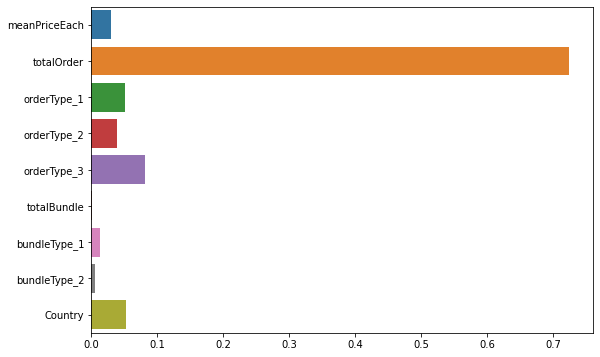

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(Model_dt.feature_importances_,
            ['meanPriceEach','totalOrder','orderType_1','orderType_2','orderType_3','totalBundle','bundleType_1','bundleType_2','Country'])

plt.show()

> * Feature Importance 값 - rf모델

In [ ]:
Model_rf.feature_importances_

array([0.0376689 , 0.45717954, 0.04625872, 0.21268081, 0.0764432 ,
       0.01594238, 0.09243945, 0.00926753, 0.05211948])

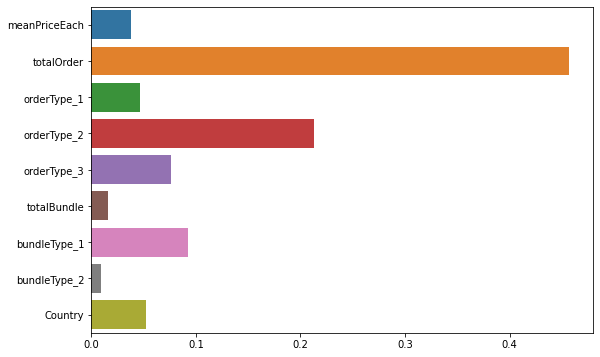

In [ ]:
plt.figure(figsize = (9,6))
sns.barplot(Model_rf.feature_importances_,
            ['meanPriceEach','totalOrder','orderType_1','orderType_2','orderType_3','totalBundle','bundleType_1','bundleType_2','Country'])

plt.show()

### 5. Hyperparameter Tuning
> * rf모델에 GridSearchCV 적용하기

In [45]:
#객체 생성
from sklearn.ensemble import RandomForestClassifier

Model_rf = RandomForestClassifier()

#하이퍼파라미터 설정 : n_estimators를 900까지 넣었었는데 30분넘게 걸려도 안끝나서 지우고 다시수행...
params = {'n_estimators' : [100,300,500,700],
          'max_features' : [1,2,3,4],
          'max_depth' : [3,4,5,6,7],
          'random_state' : [2045]}

In [46]:
#GridSearchCV 객체 생성
from sklearn.model_selection import GridSearchCV, KFold

grid_cv = GridSearchCV(Model_rf,
                       param_grid = params,
                       scoring = 'accuracy',  #Recall이나 Precision도 설정가능
                       cv = KFold(n_splits = 5,
                                  random_state = 2045),
                       refit = True,
                       n_jobs = -1)

In [47]:
#GridSearchCV 수행 + 소요 시간 측정
from datetime import datetime

start_time = datetime.now()

grid_cv.fit(X_train, y_train)

end_time = datetime.now()
print('Elapsed Time : ', end_time - start_time)

Elapsed Time :  0:17:51.893723


> * 최적의 하이퍼파라미터 확인하기

In [48]:
#Best Accuracy
grid_cv.best_score_

0.9928610860398587

In [49]:
#Best Hyperparameter
grid_cv.best_params_

{'max_depth': 7, 'max_features': 3, 'n_estimators': 300, 'random_state': 2045}

> * 최적 모델 생성

In [50]:
Model_CV = grid_cv.best_estimator_

In [60]:
y_hat_cv = Model_CV.predict(X_test)

y_hat_cv

array(['Online', 'Offline', 'Offline', ..., 'Offline', 'Online', 'Online'],
      dtype=object)

### 6. Model별 Coufusion Matrix 확인 및 Accuracy 비교 

In [61]:
from sklearn.metrics import confusion_matrix, accuracy_score

> * Logistic Regression Model

In [62]:
confusion_matrix(y_test, y_hat_lr, labels = ['Offline','Online'])

array([[2029,  198],
       [ 104, 2172]])

In [63]:
print(accuracy_score(y_test,y_hat_lr))

0.9329335998223407


> * Decision Tree Model

In [64]:
confusion_matrix(y_test, y_hat_dt)

array([[2206,   21],
       [  38, 2238]])

In [65]:
print(accuracy_score(y_test,y_hat_dt))

0.9868976238063514


> Random Forest Model

In [66]:
confusion_matrix(y_test, y_hat_rf)

array([[2222,    5],
       [  32, 2244]])

In [67]:
print(accuracy_score(y_test,y_hat_rf))

0.9917832556073729


> * GridSearchCV Model

In [68]:
confusion_matrix(y_test, y_hat_cv)

array([[2219,    8],
       [  41, 2235]])

In [69]:
print(accuracy_score(y_test,y_hat_cv))

0.9891183655340884


> * Accuracy 비교

In [70]:
result = [accuracy_score(y_test,y_hat_lr),accuracy_score(y_test,y_hat_dt),accuracy_score(y_test,y_hat_rf),accuracy_score(y_test,y_hat_cv)]

In [71]:
print('lr모델 Accuracy : ', accuracy_score(y_test,y_hat_lr))
print('dt모델 Accuracy : ', accuracy_score(y_test,y_hat_dt))
print('rf모델 Accuracy : ', accuracy_score(y_test,y_hat_rf))
print('cv모델 Accuracy : ', accuracy_score(y_test,y_hat_cv))

lr모델 Accuracy :  0.9329335998223407
dt모델 Accuracy :  0.9868976238063514
rf모델 Accuracy :  0.9917832556073729
cv모델 Accuracy :  0.9891183655340884


rf / cv / dt / lr 순으로 Accuracy가 좋다
(하이퍼파라미터의 설정을 변경하면 cv모델의 Accuracy가 더 좋아질 수 있을 것 같다)